## Load data

In [7]:
import pandas as pd

log_file = "/tmp/test/head_model/history.json"
df = pd.read_json(log_file)
df

,train_loss,test_loss,test_accuracy,learning_rate
0,3.579449,3.634856,0.340681,0.001
1,2.635887,3.152064,0.414289,0.001
2,2.246425,2.906274,0.437906,0.001
3,1.998977,2.696450,0.465460,0.001
4,1.816186,2.597606,0.481401,0.001
5,1.667345,2.503689,0.495965,0.001
6,1.548478,2.447823,0.506003,0.001
7,1.443428,2.443721,0.515843,0.001
8,1.360072,2.439814,0.521157,0.001
9,1.283748,2.446616,0.524306,0.001


## Loss

<Axes: >

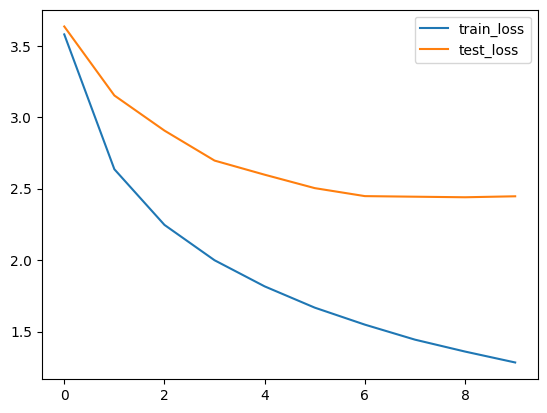

In [8]:
# plot the loss
df[['train_loss','test_loss']].plot()

## Accuracy

<Axes: >

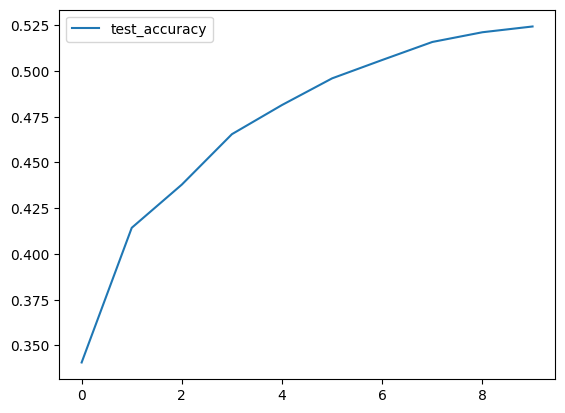

In [9]:
# plot accuracy
df[['test_accuracy']].plot()

## Learning rate

<Axes: >

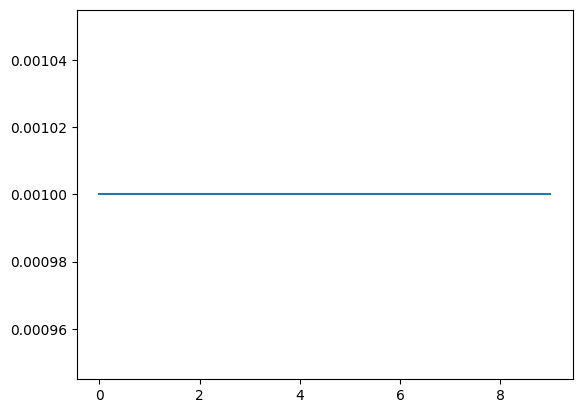

In [3]:
df['learning_rate'].plot()